In [1]:
from __future__ import division
import matplotlib.pyplot as plt
plt.style.use('classic')
import matplotlib.dates as dts
import numpy as np
import runProcs
from scipy.stats import gaussian_kde
import pandas as pd
%matplotlib inline

# This program requires the Penn World Tables data file: pwt90.xlsx
# available at https://pwt.sas.upenn.edu/

In [2]:
# 0. Setup

# 0.1 general plot settings

font = {'weight' : 'bold',
        'size'   : 15}
plt.rc('font', **font)
plt.rcParams['xtick.major.pad']='8'
plt.rcParams['ytick.major.pad']='8'


# 0.2 Formatter for inserting commas in y axis labels with magnitudes in the thousands

def func(x, pos):  # formatter function takes tick label and tick position
   s = '{:0,d}'.format(int(x))
   return s

y_format = plt.FuncFormatter(func)  # make formatter

# 0.3 format the x axis ticksticks
years2,years4,years5,years10,years15= dts.YearLocator(2),dts.YearLocator(4),dts.YearLocator(5),dts.YearLocator(10),dts.YearLocator(15)


# 0.4 y label locator for vertical axes plotting gdp
majorLocator_y   = plt.MultipleLocator(3)
majorLocator_shares   = plt.MultipleLocator(0.2)

# 0.5 Index locator
def findDateIndex(dateStr,fredObj):
    for n,d in enumerate(fredObj.dates):
        if d == dateStr:
            return n

In [3]:
# 1. Import data
pwt = pd.read_excel('pwt90.xlsx',sheet_name='Data')

In [4]:
# 2. lists of countries, codes, and years
year0 = 1960

countryCodes=[]
countries = []
years = []
for code in pwt['countrycode']:
    if code not in countryCodes:
        countryCodes.append(code)
        
for country in pwt['country']:
    if country == u"Côte d'Ivoire":
        country = u"Cote d'Ivoire"
    if country not in countries:
        countries.append(country)
        
for year in pwt['year']:
    if year not in years:
        years.append(year)

year0= years.index(year0)
len(years)

65

In [5]:
# 3. Create deatasets

# 3.1 income and population datasets
incomeDict = {}
incomePcDict = {}
popDict = {}
count=0
for i,code in enumerate(countryCodes):
    income = pwt.loc[pwt['countrycode'] == code]['cgdpe'].values
    pop = pwt.loc[pwt['countrycode'] == code]['pop'].values
    incomePc = income/pop
    if code =='ZWE':
        income = income[0:len(years)]
        incomePc = incomePc[0:len(years)]
        pop = pop[0:len(years)]
    if True not in [np.isnan(x) for x in incomePc[year0:]]:
        incomeDict[countries[i]+' - '+code] = income[year0:].tolist()
        incomePcDict[countries[i]+' - '+code] = incomePc[year0:].tolist()
        popDict[countries[i]+' - '+code] = pop[year0:].tolist()
        count+=1

income = pd.DataFrame(incomeDict,index=years[year0:])
incomePc = pd.DataFrame(incomePcDict,index=years[year0:])

incomePc = np.round(incomePc,5)
incomePcLog = np.round(np.log(incomePc),5)

# totalPop = pop.sum(axis=1)
# totalIncome = income.sum(axis=1)
# totalIncomePc = totalIncome/totalPop

print(count,' countries in the sample.')

incomePc.to_csv('crossCountryIncomePerCapita.csv',index_label='year')
incomePcLog.to_csv('crossCountryIncomePerCapitaLog.csv',index_label='year')

# 3.2 Other datasets

def createDataSet(pwtCode='cgdpe',perCapita=True,perWorker=False,fileName='test'):
    
    newDict = {}
    newPcDict = {}
    newPwDict = {}
    popDict = {}
    employedDict = {}

    for i,code in enumerate(countryCodes):
        income = pwt.loc[pwt['countrycode'] == code]['cgdpe'].values
        pop = pwt.loc[pwt['countrycode'] == code]['pop'].values
        employed = pwt.loc[pwt['countrycode'] == code]['emp'].values
        
        incomePc = income/pop
        new = pwt.loc[pwt['countrycode'] == code][pwtCode].values
        newPc = new/pop
        newPw = new/employed
        
        if code =='ZWE':
            income = income[0:len(years)]
            incomePc = incomePc[0:len(years)]
            new = new[0:len(years)]
            newPc = newPc[0:len(years)]
            newPw = newPw[0:len(years)]
            pop = pop[0:len(years)]
            employed = employed[0:len(years)]
        if True not in [np.isnan(x) for x in incomePc[year0:]]:
            newDict[countries[i]+' - '+code] = new[year0:].tolist()
            newPcDict[countries[i]+' - '+code] = newPc[year0:].tolist()
            newPwDict[countries[i]+' - '+code] = newPw[year0:].tolist()
    
    new = pd.DataFrame(newDict,index=years[year0:])
    newPc = pd.DataFrame(newPcDict,index=years[year0:])
    newPw = pd.DataFrame(newPwDict,index=years[year0:])
    
    new = np.round(new,5)
    newPc = np.round(newPc,5)
    newPw = np.round(newPw,5)

    if perCapita == True:
        newPc.to_csv(fileName+'.csv',index_label='year')
        return newPc
    elif perWorker == True:
        newPw.to_csv(fileName+'.csv',index_label='year')
        return newPw
    else:
        new.to_csv(fileName+'.csv',index_label='year')    
        return new

incomePw = createDataSet(pwtCode='cgdpe',perCapita=False,perWorker=True,fileName='crossCountryIncomePerWorker')
outputPw = createDataSet(pwtCode='cgdpo',perCapita=False,perWorker=True,fileName='crossCountryOutputPerWorker')
outputPc = createDataSet(pwtCode='cgdpo',perCapita=True,perWorker=False,fileName='crossCountryOutputPerCapita')
consumptionPc = createDataSet(pwtCode='ccon',perCapita=True,perWorker=False,fileName='crossCountryConsumptionPerCapita')
physicalCapitalPw = createDataSet(pwtCode='ck',perCapita=False,perWorker=True,fileName='crossCountryPhysicalCapitalPerWorker')
physicalCapitalPc = createDataSet(pwtCode='ck',perCapita=True,perWorker=False,fileName='crossCountryPhysicalCapitalPerCapita')
humanCapitalPc = createDataSet(pwtCode='hc',perCapita=False,perWorker=False,fileName='crossCountryHumanCapitalPerCapita')
employed = createDataSet(pwtCode='hc',perCapita=False,perWorker=False,fileName='crossCountryEmployed')
hours = createDataSet(pwtCode='avh',perCapita=False,perWorker=False,fileName='crossCountryHours')
popluation = createDataSet(pwtCode='pop',perCapita=False,perWorker=False,fileName='crossCountryPopulation')
savingRate = createDataSet(pwtCode='csh_i',perCapita=False,perWorker=False,fileName='crossCountrySavingRate')
laborShare = createDataSet(pwtCode='labsh',perCapita=False,perWorker=False,fileName='crossCountryLaborShare')
depreciation = createDataSet(pwtCode='delta',perCapita=False,perWorker=False,fileName='crossCountryDepreciationRate')

111  countries in the sample.


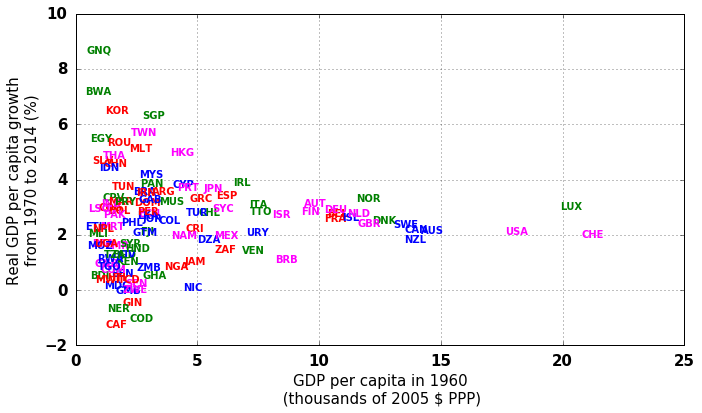

In [6]:
# 4. Plot for website
data = pd.read_csv('crossCountryIncomePerCapita.csv',index_col='year')
income60 = data.iloc[0]/1000
growth = 100*((data.iloc[-1]/data.iloc[0])**(1/(len(data.index)-1))-1)

fig = plt.figure(figsize=(10, 6)) 
ax = fig.add_subplot(1,1,1)
colors = ['red','blue','magenta','green']

plt.scatter(income60,growth,s=0.0001)
for i, txt in enumerate(data.columns):
    
    ax.annotate(txt[-3:], (income60[i],growth[i]),fontsize=10,color = colors[np.mod(i,4)])
ax.grid()
# ax.set_xscale('log')
ax.set_xlabel('GDP per capita in 1960\n (thousands of 2005 $ PPP)')
ax.set_ylabel('Real GDP per capita growth\nfrom 1970 to '+str(years[-1])+ ' (%)')
ax.set_xlim([0,25])

fig.tight_layout()
plt.savefig('fig_GDP_GDP_Growth_site.png',bbox_inches='tight')

In [7]:
#5. Export notebook to python script
runProcs.exportNb('crossCountryIncomeData')